# Load & Info & Data Preprocessing

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
X = pd.read_csv('../data/train_merge_tfidf.csv')
y = pd.read_csv('../data/y.csv')

In [103]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# # Create a count plot
# sns.countplot(y='country_destination', data=y, order=y['country_destination'].value_counts().index)

# plt.title("Distribution of Country Destinations", size=13)
# plt.xlabel("Number of Users")
# plt.ylabel("Country Destination")
# plt.grid(axis='x')  # Add grid lines to the x-axis for better readability

# # Calculate and display the percentage labels on each bar
# total = len(y)
# for p in plt.gca().patches:
#     percentage = '{:.1f}%'.format(100 * p.get_width() / total)
#     x = p.get_x() + p.get_width() + 0.02  # Adjust the position of the label
#     y = p.get_y() + p.get_height() / 2
#     plt.annotate(percentage, (x, y))

# plt.show()

In [104]:
#Checking null values
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
518    0
519    0
520    0
521    0
522    0
Length: 523, dtype: int64

In [105]:
X = X.dropna()

In [106]:
X = X[:10000]
y = y[:10000]

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(4000, 523)

In [108]:
print(X_train.dtypes)

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
518    float64
519    float64
520    float64
521    float64
522    float64
Length: 523, dtype: object


In [109]:
print(y_train.dtypes)

target_column_name    object
dtype: object


# selector1

In [110]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k=100)
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [111]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

## selector2

We need to convert "country_destination" to int

In [112]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [113]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k=15)
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['11', '12', '175', '246', '296', '337', '376', '389', '394', '415',
       '433', '473', '475', '479', '522'],
      dtype='object')


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  4   5   7   8  17  18  27  29  52  53  60  68  91  96  98 100 101 102
 103 107 110 111 112 114 118 119 146 147 150 154 162 163 168 169 170 171
 172 185 190 192 204 205 224 236 238 239 245 248 263 268 269 271 278 286
 287 288 300 301 303 304 305 306 307 324 329 349 352 356 357 360 362 371
 412 413 414 416 419 420 425 429 430 449 451 452 463 464 470 471 472 476
 483 486 498 507 515] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Selected

In [114]:
selected_feature_names

Index(['11', '12', '175', '246', '296', '337', '376', '389', '394', '415',
       '433', '473', '475', '479', '522'],
      dtype='object')

In [115]:
X = X[selected_feature_names]

In [116]:
X.shape

(10000, 15)

In [117]:
y.shape

(10000, 1)

In [118]:
# sns.heatmap(X.corr(), annot= True)

In [119]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(4000, 15)

# Fiting

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# Evaluation

In [121]:
y_pred = pipeline.predict(X)

from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6655
Classification Report:
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        24
          CA       0.00      0.00      0.00        31
          DE       0.00      0.00      0.00        41
          ES       0.00      0.00      0.00        88
          FR       0.00      0.00      0.00       197
          GB       0.00      0.00      0.00        78
          IT       0.00      0.00      0.00       118
         NDF       0.67      0.96      0.79      6103
          NL       0.00      0.00      0.00        27
          PT       0.00      0.00      0.00         6
          US       0.63      0.28      0.39      2787
       other       0.00      0.00      0.00       500

    accuracy                           0.67     10000
   macro avg       0.11      0.10      0.10     10000
weighted avg       0.59      0.67      0.59     10000



C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predict

In [122]:
X.head()

,11,12,175,246,296,337,376,389,394,415,433,473,475,479,522
0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,1.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,1.0,0.0,0.0,0.0,0.184353,0.19161,0.0,0.156248,0.277931,0.0,0.603652,0.251401,0.245959,0.0,0.0
3,1.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,1.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [123]:
y

,target_column_name
0,other
1,NDF
2,NDF
3,NDF
4,GB
...,...
9995,NDF
9996,NDF
9997,NDF
9998,US


In [124]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Submission1

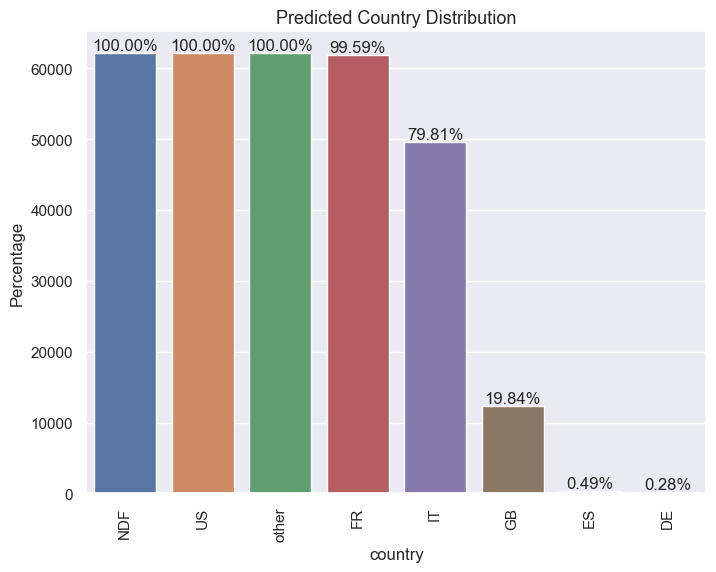

In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_target = le.fit_transform(y['target_column_name'])

#test csv

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_merge_tfidf.csv")

test_df = pd.read_csv('../data/test_users.csv')

test_id = test_df['id'].values

test_id

# https://www.kaggle.com/kevinwu06/feature-importance-w-xgboost

pred = pipeline.predict_proba(test_data[selected_feature_names])

ids = []
countries = []

# Taking the 5 classes with highest probabilities

for i in range(len(test_id)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(pred[i])[::-1][:5]).tolist()
    
# Generate submission

sub = pd.DataFrame({"id" : ids,"country" : countries})

sub.to_csv('../data/submission_LR_new.csv', index = False)

import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Calculate percentages
total_samples = len(test_data)
ax = sns.countplot(x='country', data=sub, order=sub['country'].value_counts().index)

# Add percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_samples*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Predicted Country Distribution", size=13)
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
plt.show()

# Visualize

In [126]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

ValueError: Found input variables with inconsistent numbers of samples: [4000, 10000]

In [ ]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Submission

### data

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_merge_tfidf.csv")

# Cleaning
test_data = test_data[selected_feature_names]

In [ ]:
test_data

In [ ]:
#Checking null values
test_data.isnull().sum()

In [ ]:
test_data = test_data.dropna()

In [ ]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data)

In [ ]:
y

In [ ]:
y['country_destination'] = y['target_column_name'].astype('category')

# # Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=y['country_destination'].cat.categories)

In [ ]:
test_data

In [ ]:
test_data['predicted_country'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Calculate percentages
total_samples = len(test_data)
ax = sns.countplot(x='predicted_country', data=test_data, order=test_data['predicted_country'].value_counts().index)

# Add percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_samples*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Predicted Country Distribution", size=13)
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
plt.show()

In [ ]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)